In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [25]:
data=pd.read_csv('email spams.csv',encoding='ISO-8859-1')
data

,title,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
1334,ham,"Oh... Icic... K lor, den meet other day..."
1335,ham,Oh ! A half hour is much longer in Syria than ...
1336,ham,"Sometimes we put walls around our hearts,not j..."
1337,ham,"Sweet, we may or may not go to 4U to meet carl..."


In [26]:
data.head()

,title,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data.tail()

,title,Message
1334,ham,"Oh... Icic... K lor, den meet other day..."
1335,ham,Oh ! A half hour is much longer in Syria than ...
1336,ham,"Sometimes we put walls around our hearts,not j..."
1337,ham,"Sweet, we may or may not go to 4U to meet carl..."
1338,ham,Then she buying today? Ü no need to c meh...


In [28]:
data.shape

(1339, 2)

In [29]:
data.columns

Index(['title', 'Message'], dtype='object')

In [30]:
print(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1339 non-null   object
 1   Message  1339 non-null   object
dtypes: object(2)
memory usage: 21.0+ KB
None


title      0
Message    0
dtype: int64

In [31]:
data.nunique()

title         2
Message    1297
dtype: int64

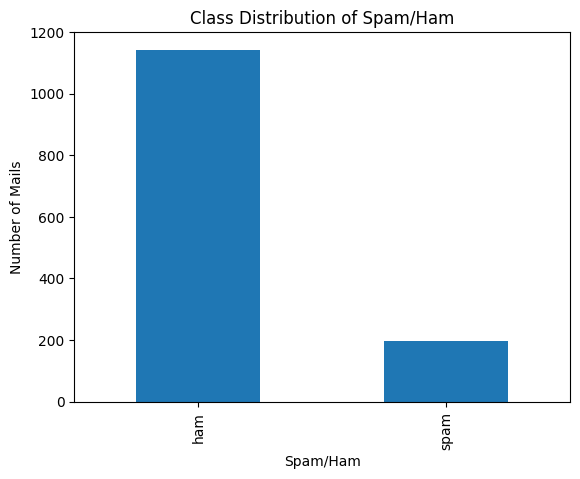

In [32]:
class_counts = data['title'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [33]:
# Encoding Categories into 0 and 1 :
data["Spam"] = [1 if i=="spam" else 0 for i in data["title"]]
data.head()

,title,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
X = data["Message"]
y = data.Spam

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1071,), (268,), (1071,), (268,))

In [37]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [38]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
clf.score(X_test,y_test)

0.9813432835820896

In [43]:
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)

In [44]:
nb = MultinomialNB()
targets = y_train.values
nb.fit(count, targets)
y_pred = nb.predict(Vectorizer.transform(X_test))

In [22]:
message = ["Even my brother is not like to speak with me. They treat me like aids patent.",
"I HAVE A DATE ON SUNDAY WITH WILL!!",
"	URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
"Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed �1000 cash or �5000 prize!",
" Umma. Did she say anything "]

y_pred = clf.predict(message)
for i in y_pred:
    if i==0:
        print("Not a Spam email 👍")
    else:
        print("Spam email 🛑")

Not a Spam email 👍
Not a Spam email 👍
Spam email 🛑
Spam email 🛑
Not a Spam email 👍


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       236
           1       0.94      0.91      0.92        32

    accuracy                           0.98       268
   macro avg       0.96      0.95      0.96       268
weighted avg       0.98      0.98      0.98       268



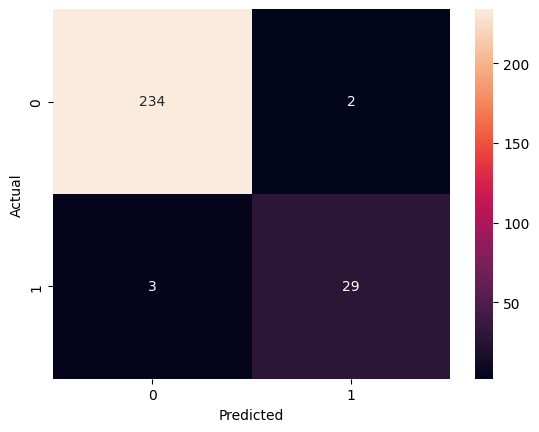

In [49]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test , y_pred))

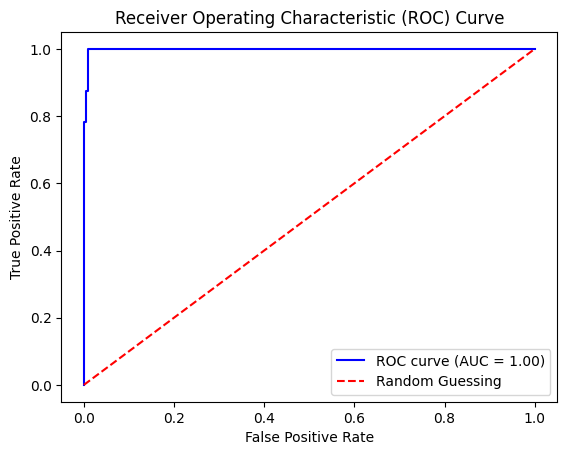

In [54]:
y_test = np.array(y_test, dtype=int)
y_pred_prob = nb.predict_proba(Vectorizer.transform(X_test))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




 In conclusion, an email spam detection model based on Naive Bayes was created, with an accuracy of 0.96 and ROC AUC of 1.00. The model performs well at differentiating between spam and legitimate emails. The model accurately categorizes the vast majority of emails, with only a small fraction of misclassifications, according to the model's high accuracy score of 0.96. The Naive Bayes method can handle text categorization problems like email spam detection, as shown here.
 Additionally, the model appears to have great discriminatory power based on the ROC AUC score of 1.00. By reducing false positive and false negative rates, it excels at differentiating between spam and non-spam emails.
 This shows that the predictions made by the model are accurate and consistent.




